In [1]:
#WeatherPy Analysis

#There is a relationship between the latitude and the maximum temperature. The temperatures in the southern hemisphere
#generally never reach the freezing point of 32 degrees fahrenheit and as the latitude increases the warmer the cities are.
#However, the higher the latitude in the northern hemisphere, temperature tends to drop a greater rate than it increases
#in the southern hemisphere.

#There is no meaningful relationship between the latidude and humidity when comparing the northern and southern hemispheres.
#Of note is the cluster of cities in the norther hemisphere that are close to the equator with a low humidity.

#There is no meaningful relationship between the latitude and cloudiness when comparing the northern and southern
#hemispheres

#There is no meaningful relationship between the latitude and wind speed in the northern and southern hemispheres. Wind
#speed on average falls between 0 mph and 15 mph with a few datapoints outside of this range.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import json
import pandas as pd
import numpy as np
import requests
import datetime
import time

# Import API key
from api_keys import api_key

#print(api_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# Create a dataframe to hold weather data
city_df=pd.DataFrame()

# Add columns for city and country from citipy
city_df["City"]=""
city_df["Country"]=""

In [4]:
# List for holding lat_lngs, cities, and countries
lat_arr=[]
lat_data=[]
lng_arr=[]
lng_data=[]
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


In [5]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)
        lat_data=lat_lng[0]
        lat_arr.append(lat_data)
        lng_data=lat_lng[1]
        lng_arr.append(lng_data)

# Print the city count to confirm sufficient count
len(cities)  

589

In [6]:
# Create dataframe of Cities
city_df["City"]=cities
city_df["Country"]=countries
city_df["Latitude"]=lat_arr
city_df["Longitude"]=lng_arr
city_df

,City,Country,Latitude,Longitude
0,pacific grove,us,28.253055,-132.757884
1,yellowknife,ca,74.246408,-108.341358
2,belushya guba,ru,89.269163,48.070969
3,rikitea,pf,-47.936799,-109.853658
4,ushuaia,ar,-61.431034,-50.419467
5,cape town,za,-66.804070,-12.819982
6,jamestown,sh,-12.389675,0.886708
7,bardiyah,ly,31.571834,24.617131
8,kaitangata,nz,-53.216605,173.647719
9,gien,fr,47.351062,2.770963


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
#Add columns to city_df to hold information
#city_df['Latitude']=""
#city_df['Longitude']=""
city_df['Max Temperature']=""
city_df['Humidity']=""
city_df["Clouds"]=""
city_df["Wind Speed"]=""
city_df["Date"]=""
city_df


,City,Country,Latitude,Longitude,Max Temperature,Humidity,Clouds,Wind Speed,Date
0,pacific grove,us,28.253055,-132.757884,,,,,
1,yellowknife,ca,74.246408,-108.341358,,,,,
2,belushya guba,ru,89.269163,48.070969,,,,,
3,rikitea,pf,-47.936799,-109.853658,,,,,
4,ushuaia,ar,-61.431034,-50.419467,,,,,
5,cape town,za,-66.804070,-12.819982,,,,,
6,jamestown,sh,-12.389675,0.886708,,,,,
7,bardiyah,ly,31.571834,24.617131,,,,,
8,kaitangata,nz,-53.216605,173.647719,,,,,
9,gien,fr,47.351062,2.770963,,,,,


In [8]:
base_url = "https://api.openweathermap.org/data/2.5/weather?"

# Convert Open Weater temperature to Fahrenheit
units="imperial"

# Set counter
count=0

In [9]:
# Iterate through rows in city_df to get weather information
for index, row in city_df.iterrows():
    count+=1
    target_url= base_url + "APPID=" + api_key + "&units=" + units + "&q=" + row['City']

    
    # Run if data is not available. 
    try:
        city_response = requests.get(target_url).json()
        print(f"This is iteration {count} representing city {row['City']}.")
        print(f"URL: {target_url}")
        #print(json.dumps(city_response, indent=4, sort_keys=True))
        
        # Store array data in city_df dataframe
        #city_df.loc[index,"Latitude"]=city_response['coord']['lat']
        #city_df.loc[index,"Longitude"]=city_response['coord']['lon']
        city_df.loc[index,"Max Temperature"]=city_response['main']['temp_max']       
        city_df.loc[index,"Humidity"]=city_response['main']['humidity'] 
        city_df.loc[index,"Clouds"]=city_response['clouds']['all']
        city_df.loc[index,"Wind Speed"]=city_response['wind']['speed']
        city_df.loc[index,"Date"]=city_response['dt']
                
              
    except:
        print(f"Information not available for {row['City']}")

indexNames = city_df[city_df['Max Temperature'] == "" ].index
 
# Delete these row indexes from dataFrame
city_df.drop(indexNames , inplace=True)
city_df.dropna()


This is iteration 1 representing city pacific grove.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=pacific grove
This is iteration 2 representing city yellowknife.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=yellowknife
This is iteration 3 representing city belushya guba.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=belushya guba
Information not available for belushya guba
This is iteration 4 representing city rikitea.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=rikitea
This is iteration 5 representing city ushuaia.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=ushuaia
This is iteration 6 representing city cape town.
URL: https://api.openweathermap.org/data/2.5/weather?AP

This is iteration 50 representing city codrington.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=codrington
This is iteration 51 representing city hithadhoo.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=hithadhoo
This is iteration 52 representing city flin flon.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=flin flon
This is iteration 53 representing city hamilton.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=hamilton
This is iteration 54 representing city kasongo-lunda.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=kasongo-lunda
This is iteration 55 representing city sola.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=impe

This is iteration 97 representing city kavaratti.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=kavaratti
This is iteration 98 representing city okandja.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=okandja
Information not available for okandja
This is iteration 99 representing city sao felix do xingu.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=sao felix do xingu
This is iteration 100 representing city goderich.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=goderich
This is iteration 101 representing city taraz.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=taraz
This is iteration 102 representing city opotiki.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37d

This is iteration 145 representing city imeni tsyurupy.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=imeni tsyurupy
This is iteration 146 representing city walvis bay.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=walvis bay
This is iteration 147 representing city klaksvik.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=klaksvik
This is iteration 148 representing city ahipara.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=ahipara
This is iteration 149 representing city nanortalik.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=nanortalik
This is iteration 150 representing city labuhan.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&u

URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=mangan
This is iteration 194 representing city port elizabeth.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=port elizabeth
This is iteration 195 representing city camacha.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=camacha
This is iteration 196 representing city dzilam gonzalez.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=dzilam gonzalez
This is iteration 197 representing city barawe.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=barawe
Information not available for barawe
This is iteration 198 representing city strelka.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial

This is iteration 240 representing city schattdorf.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=schattdorf
This is iteration 241 representing city adrar.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=adrar
This is iteration 242 representing city shetpe.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=shetpe
This is iteration 243 representing city zhicheng.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=zhicheng
This is iteration 244 representing city cidreira.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=cidreira
This is iteration 245 representing city aldan.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=aldan
This

This is iteration 289 representing city yatou.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=yatou
This is iteration 290 representing city sistranda.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=sistranda
This is iteration 291 representing city hualmay.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=hualmay
This is iteration 292 representing city whitley bay.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=whitley bay
This is iteration 293 representing city yichang.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=yichang
This is iteration 294 representing city batagay-alyta.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&

This is iteration 338 representing city kangaatsiaq.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=kangaatsiaq
This is iteration 339 representing city najran.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=najran
This is iteration 340 representing city leningradskiy.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=leningradskiy
This is iteration 341 representing city huarmey.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=huarmey
This is iteration 342 representing city cape elizabeth.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=cape elizabeth
Information not available for cape elizabeth
This is iteration 343 representing city sao joao da barra.
URL: https://api.openweathermap.or

This is iteration 386 representing city grindavik.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=grindavik
This is iteration 387 representing city ketchikan.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=ketchikan
This is iteration 388 representing city tocache.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=tocache
This is iteration 389 representing city nishihara.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=nishihara
This is iteration 390 representing city villaviciosa.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=villaviciosa
This is iteration 391 representing city port hardy.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&unit

This is iteration 436 representing city atambua.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=atambua
This is iteration 437 representing city bo phloi.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=bo phloi
This is iteration 438 representing city tripoli.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=tripoli
This is iteration 439 representing city chuka.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=chuka
This is iteration 440 representing city port lincoln.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=port lincoln
This is iteration 441 representing city mys shmidta.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=

This is iteration 484 representing city westport.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=westport
This is iteration 485 representing city kavieng.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=kavieng
This is iteration 486 representing city notse.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=notse
This is iteration 487 representing city namibe.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=namibe
This is iteration 488 representing city talnakh.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=talnakh
This is iteration 489 representing city grand gaube.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=grand gaube


This is iteration 532 representing city dustlik.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=dustlik
This is iteration 533 representing city waipawa.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=waipawa
This is iteration 534 representing city warmbad.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=warmbad
This is iteration 535 representing city takapau.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=takapau
This is iteration 536 representing city anadyr.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=anadyr
This is iteration 537 representing city tigil.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=tigil
This is it

This is iteration 581 representing city gazanjyk.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=gazanjyk
This is iteration 582 representing city northam.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=northam
This is iteration 583 representing city khvoynaya.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=khvoynaya
This is iteration 584 representing city gondanglegi.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=gondanglegi
This is iteration 585 representing city fortuna.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q=fortuna
This is iteration 586 representing city rorvik.
URL: https://api.openweathermap.org/data/2.5/weather?APPID=37dbb8cf18d05f798be75085bcda1eba&units=imperial&q

,City,Country,Latitude,Longitude,Max Temperature,Humidity,Clouds,Wind Speed,Date
0,pacific grove,us,28.253055,-132.757884,66.99,87,1,5.79,1559716054
1,yellowknife,ca,74.246408,-108.341358,46.4,87,75,11.41,1559716025
3,rikitea,pf,-47.936799,-109.853658,75.32,79,26,2.33,1559715780
4,ushuaia,ar,-61.431034,-50.419467,36.44,91,100,5.79,1559715782
5,cape town,za,-66.804070,-12.819982,59,76,20,8.05,1559715737
6,jamestown,sh,-12.389675,0.886708,56.42,41,0,7.61,1559715949
8,kaitangata,nz,-53.216605,173.647719,39.99,79,18,1.99,1559715781
9,gien,fr,47.351062,2.770963,55.99,89,100,3.53,1559716297
10,bowen,au,-18.559332,149.590803,66.2,45,100,9.17,1559716206
11,iquique,cl,-21.153179,-69.778178,62.6,67,75,3.36,1559716298


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# Show number of records
city_df.head()

,City,Country,Latitude,Longitude,Max Temperature,Humidity,Clouds,Wind Speed,Date
0,pacific grove,us,28.253055,-132.757884,66.99,87,1,5.79,1559716054
1,yellowknife,ca,74.246408,-108.341358,46.4,87,75,11.41,1559716025
3,rikitea,pf,-47.936799,-109.853658,75.32,79,26,2.33,1559715780
4,ushuaia,ar,-61.431034,-50.419467,36.44,91,100,5.79,1559715782
5,cape town,za,-66.804070,-12.819982,59,76,20,8.05,1559715737


In [11]:
# Show city_df table
city_df

,City,Country,Latitude,Longitude,Max Temperature,Humidity,Clouds,Wind Speed,Date
0,pacific grove,us,28.253055,-132.757884,66.99,87,1,5.79,1559716054
1,yellowknife,ca,74.246408,-108.341358,46.4,87,75,11.41,1559716025
3,rikitea,pf,-47.936799,-109.853658,75.32,79,26,2.33,1559715780
4,ushuaia,ar,-61.431034,-50.419467,36.44,91,100,5.79,1559715782
5,cape town,za,-66.804070,-12.819982,59,76,20,8.05,1559715737
6,jamestown,sh,-12.389675,0.886708,56.42,41,0,7.61,1559715949
8,kaitangata,nz,-53.216605,173.647719,39.99,79,18,1.99,1559715781
9,gien,fr,47.351062,2.770963,55.99,89,100,3.53,1559716297
10,bowen,au,-18.559332,149.590803,66.2,45,100,9.17,1559716206
11,iquique,cl,-21.153179,-69.778178,62.6,67,75,3.36,1559716298


In [12]:
# Save city_df to csv file
city_df.to_csv("weather_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [13]:
# Calculate Date for graph title
date=time.strftime("%Y-%m-%d")
print(date)

2019-06-05


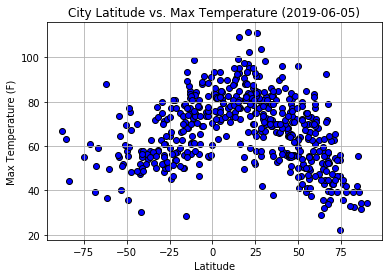

<Figure size 432x288 with 0 Axes>

In [14]:
#Create title and lables
plt.title(f'City Latitude vs. Max Temperature ({date})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.scatter(city_df["Latitude"],city_df["Max Temperature"], marker="o", facecolors="blue", edgecolors="black")
plt.grid()

plt.show()
plt.savefig("lat_temp.png")


#### Latitude vs. Humidity Plot

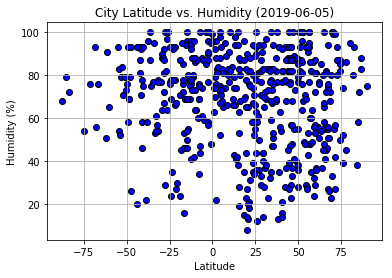

<Figure size 432x288 with 0 Axes>

In [15]:
#Create title and lables
plt.title(f'City Latitude vs. Humidity ({date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.scatter(city_df["Latitude"],city_df["Humidity"], marker="o", facecolors="blue", edgecolors="black", alpha=1)
plt.grid()

plt.show()
plt.savefig("lat_humid.png")


#### Latitude vs. Cloudiness Plot

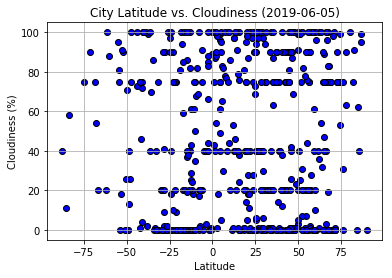

<Figure size 432x288 with 0 Axes>

In [16]:
#Create title and lables
plt.title(f'City Latitude vs. Cloudiness ({date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.scatter(city_df["Latitude"],city_df["Clouds"], marker="o", facecolors="blue", edgecolors="black", alpha=1)
plt.grid()

plt.show()
plt.savefig("lat_cloud.png")


#### Latitude vs. Wind Speed Plot

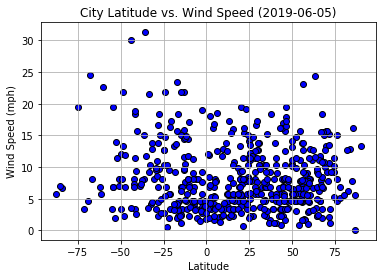

In [17]:
#Create title and lables
plt.title(f'City Latitude vs. Wind Speed ({date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.scatter(city_df["Latitude"],city_df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black", alpha=1)
plt.grid()

plt.savefig("lat_wind.png")
plt.show()
